In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

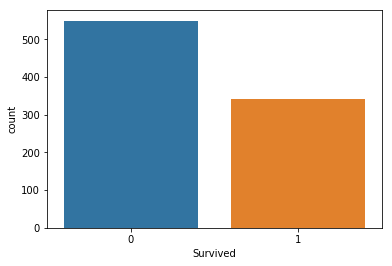

In [6]:
sns.countplot(df['Survived'])

In [7]:
pd.crosstab(df['Sex'],df['Survived'],margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


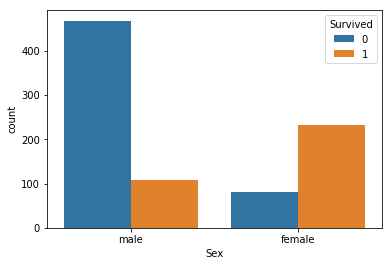

In [8]:
sns.countplot('Sex',hue='Survived',data=df)

In [9]:
pd.crosstab(df['Pclass'],df['Survived'],margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


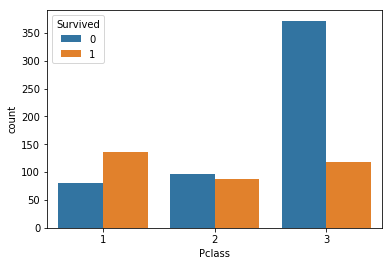

In [10]:
sns.countplot('Pclass',hue='Survived',data=df)

In [11]:
pd.crosstab([df['Sex'],df['Survived']],df['Pclass'],margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

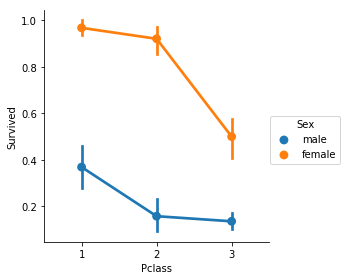

In [12]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df)

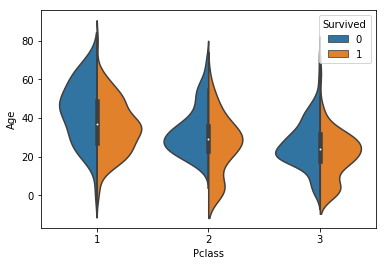

In [13]:
sns.violinplot("Pclass","Age", hue="Survived", data=df,split=True)

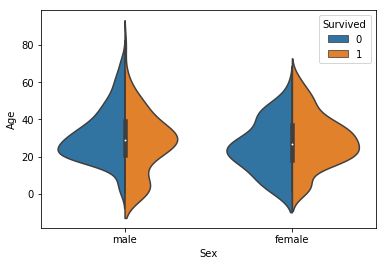

In [14]:
sns.violinplot("Sex","Age", hue="Survived", data=df,split=True)

In [15]:
df['Title']=df['Name'].apply(lambda x: x.split(', ')[1].split('.')[0])

In [16]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [17]:
pd.crosstab(df['Title'],df['Sex']).T

Title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,
female,0,0,0,1,0,1,0,0,182,2,1,0,125,1,0,0,1
male,1,2,1,6,1,0,2,40,0,0,0,517,0,0,6,1,0


In [18]:
df['Title']=df['Title'].replace(['Capt','Col','Don','Dr','Jonkheer','Lady','Major','Mlle','Mme','Ms','Rev','Sir','the Countess'],'Other')

In [19]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [20]:
pd.crosstab(df['Title'],df['Sex']).T

Title,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,182,0,125,7
male,40,0,517,0,20


In [21]:
df.groupby('Title')['Age'].mean()

Title
Master     4.574167
Miss      21.773973
Mr        32.368090
Mrs       35.898148
Other     42.384615
Name: Age, dtype: float64

In [22]:
df.loc[(df['Age'].isnull())&(df['Title']=='Master'),'Age']=5
df.loc[(df['Age'].isnull())&(df['Title']=='Miss'),'Age']=22
df.loc[(df['Age'].isnull())&(df['Title']=='Mr'),'Age']=32
df.loc[(df['Age'].isnull())&(df['Title']=='Mrs'),'Age']=36
df.loc[(df['Age'].isnull())&(df['Title']=='Other'),'Age']=42

In [23]:
df['Age'].isnull().any()

False

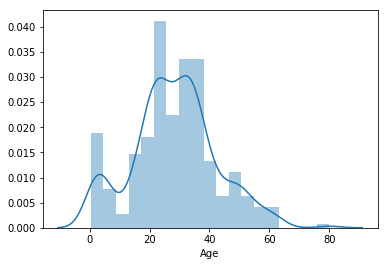

In [24]:
sns.distplot(df[df['Survived']==1]['Age'])

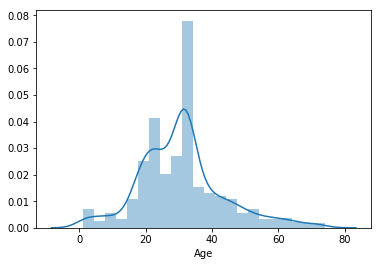

In [25]:
sns.distplot(df[df['Survived']==0]['Age'])

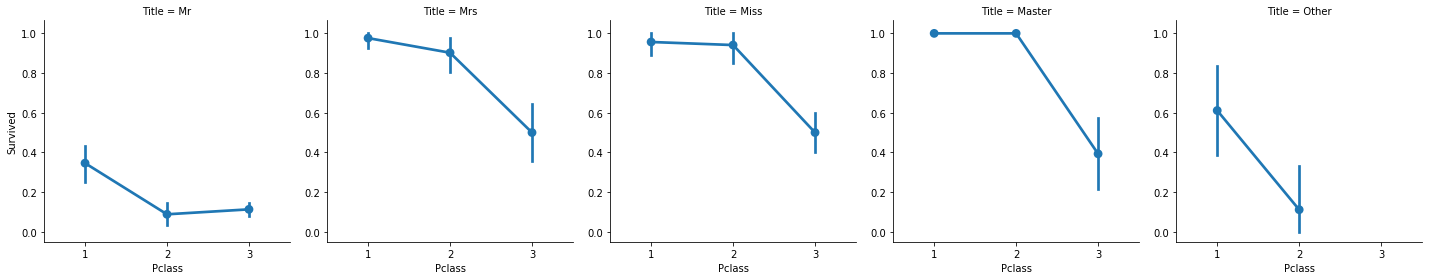

In [26]:
sns.factorplot('Pclass','Survived',col='Title',data=df)

In [27]:
pd.crosstab([df['Embarked'],df['Pclass']],[df['Sex'],df['Survived']],margins=True)

Sex             female      male       All
Survived             0    1    0    1     
Embarked Pclass                           
C        1           1   42   25   17   85
         2           0    7    8    2   17
         3           8   15   33   10   66
Q        1           0    1    1    0    2
         2           0    2    1    0    3
         3           9   24   36    3   72
S        1           2   46   51   28  127
         2           6   61   82   15  164
         3          55   33  231   34  353
All                 81  231  468  109  889

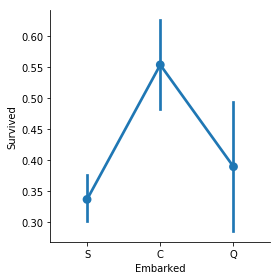

In [28]:
sns.factorplot('Embarked','Survived',data=df)

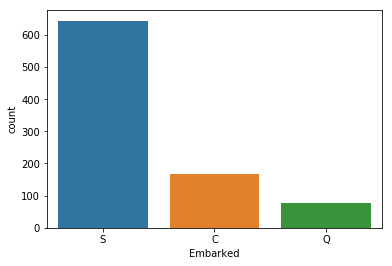

In [29]:
sns.countplot('Embarked',data=df)

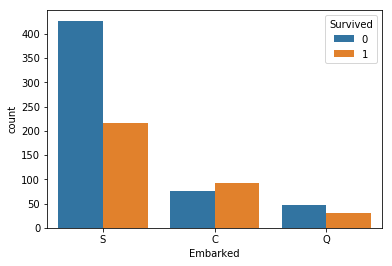

In [30]:
sns.countplot('Embarked',data=df,hue='Survived')

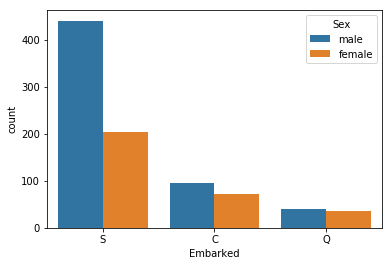

In [31]:
sns.countplot('Embarked',data=df,hue='Sex')

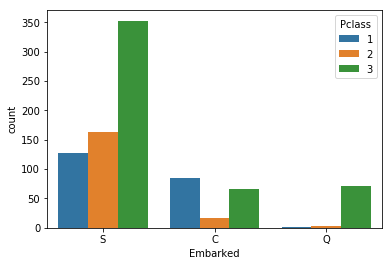

In [32]:
sns.countplot('Embarked',data=df,hue='Pclass')

In [33]:
df['Embarked'].fillna('S',inplace=True)

In [34]:
df['Embarked'].isnull().any()

False

In [35]:
pd.crosstab(df['SibSp'],df['Survived'],margins=all)

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


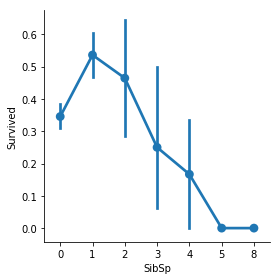

In [36]:
sns.factorplot('SibSp','Survived',data=df)

In [37]:
pd.crosstab(df['SibSp'],df['Pclass'])

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [38]:
pd.crosstab(df['Parch'],df['Survived'],margins=all)

Survived,0,1,All
Parch,,,
0,445,233,678
1,53,65,118
2,40,40,80
3,2,3,5
4,4,0,4
5,4,1,5
6,1,0,1
All,549,342,891


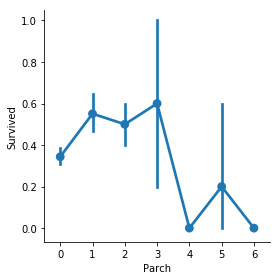

In [39]:
sns.factorplot('Parch','Survived',data=df)

In [40]:
pd.crosstab(df['Parch'],df['Pclass'])

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


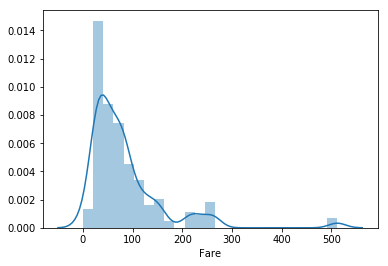

In [41]:
sns.distplot(df[df['Pclass']==1]['Fare'])

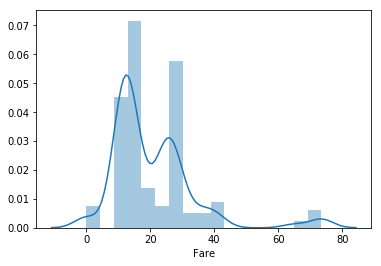

In [42]:
sns.distplot(df[df['Pclass']==2]['Fare'])

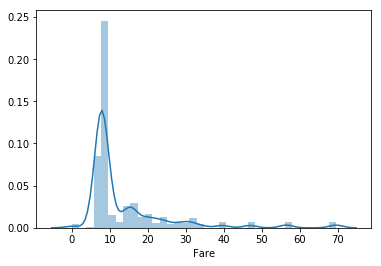

In [43]:
sns.distplot(df[df['Pclass']==3]['Fare'])

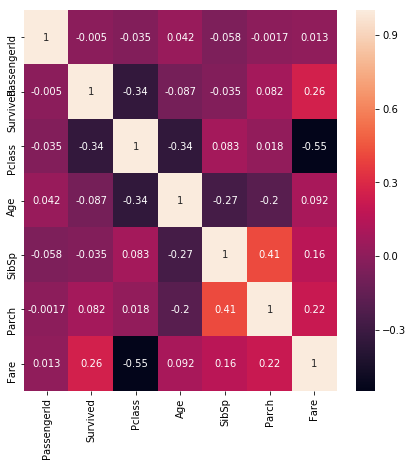

In [44]:
fig,ax = plt.subplots(figsize=(7,7))
sns.heatmap(df.corr(),annot=True)

In [45]:
df['AgeCateg']=pd.cut(df['Age'].astype(int), 5)

In [46]:
df['AgeCateg'].unique()

[(16.0, 32.0], (32.0, 48.0], (48.0, 64.0], (-0.08, 16.0], (64.0, 80.0]]
Categories (5, interval[float64]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] < (64.0, 80.0]]

In [47]:
pd.crosstab([df['AgeCateg'],df['Sex']],df['Survived'])

Survived                0    1
AgeCateg      Sex             
(-0.08, 16.0] female   16   33
              male     31   24
(16.0, 32.0]  female   46  111
              male    292   54
(32.0, 48.0]  female   17   67
              male     98   22
(48.0, 64.0]  female    2   22
              male     37    8
(64.0, 80.0]  female    0    0
              male     10    1

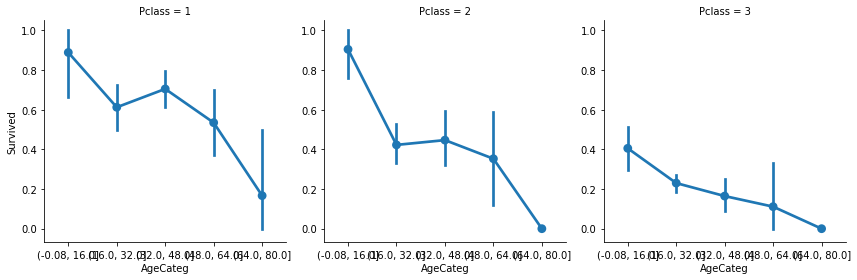

In [48]:
sns.factorplot('AgeCateg','Survived',data=df,col='Pclass')

In [49]:
df['FareCateg']=pd.qcut(df['Fare'].astype(int), 4)

In [50]:
df['FareCateg'].unique()

[(-0.001, 7.0], (31.0, 512.0], (7.0, 14.0], (14.0, 31.0]]
Categories (4, interval[float64]): [(-0.001, 7.0] < (7.0, 14.0] < (14.0, 31.0] < (31.0, 512.0]]

In [51]:
pd.crosstab(df['FareCateg'],df['Survived'])

Survived,0,1
FareCateg,,
"(-0.001, 7.0]",189,52
"(7.0, 14.0]",154,62
"(14.0, 31.0]",121,102
"(31.0, 512.0]",85,126


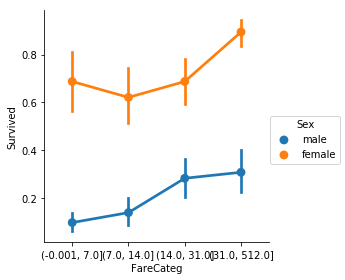

In [52]:
sns.factorplot('FareCateg','Survived',data=df,hue='Sex')

In [53]:
df['Family']=df['Parch']+df['SibSp']

In [54]:
df['Alone']=0
df.loc[df['Family']==0,'Alone']=1

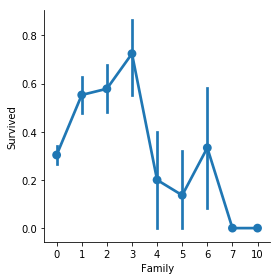

In [55]:
sns.factorplot('Family','Survived',data=df)

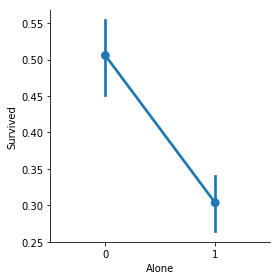

In [56]:
sns.factorplot('Alone','Survived',data=df)

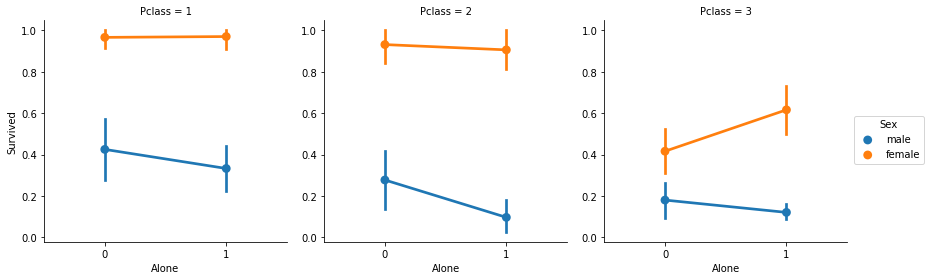

In [57]:
sns.factorplot('Alone','Survived',data=df,col='Pclass',hue='Sex')

In [58]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [59]:
df['TitleCode'] = label.fit_transform(df['Title'])
df['SexCode'] = label.fit_transform(df['Sex'])
df['EmbarkedCode'] = label.fit_transform(df['Embarked'])
df['AgeCode'] = label.fit_transform(df['AgeCateg'])
df['FareCode'] = label.fit_transform(df['FareCateg'])

In [60]:
dfo=df.copy(deep=True)

In [61]:
df=df[['SexCode','Pclass', 'EmbarkedCode', 'TitleCode','Family', 'AgeCode', 'FareCode','Survived']]
df.head()

,SexCode,Pclass,EmbarkedCode,TitleCode,Family,AgeCode,FareCode,Survived
0,1,3,2,2,1,1,0,0
1,0,1,0,3,1,2,3,1
2,0,3,2,1,0,1,0,1
3,0,1,2,3,1,2,3,1
4,1,3,2,2,0,2,1,0


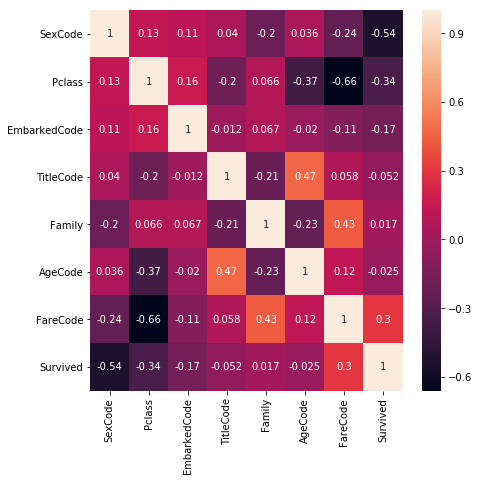

In [62]:
fig,ax = plt.subplots(figsize=(7,7))
sns.heatmap(df.corr(),annot=True,ax=ax)

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), 
                                                    df['Survived'], test_size=0.30, 
                                                    random_state=101)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [65]:
models = [
    LogisticRegression(),
    SVC(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    DecisionTreeClassifier(),
    XGBClassifier()    
    ]

In [66]:
for model in models:
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    print(type(model))
    print(confusion_matrix(y_test,prediction))
    print(accuracy_score(y_test,prediction))
    print()

<class 'sklearn.linear_model.logistic.LogisticRegression'>
[[130  24]
 [ 40  74]]
0.761194029851

<class 'sklearn.svm.classes.SVC'>
[[138  16]
 [ 36  78]]
0.805970149254

<class 'sklearn.ensemble.forest.RandomForestClassifier'>
[[140  14]
 [ 38  76]]
0.805970149254

<class 'sklearn.neighbors.classification.KNeighborsClassifier'>
[[137  17]
 [ 29  85]]
0.828358208955

<class 'sklearn.naive_bayes.GaussianNB'>
[[124  30]
 [ 29  85]]
0.779850746269

<class 'sklearn.tree.tree.DecisionTreeClassifier'>
[[140  14]
 [ 39  75]]
0.80223880597

<class 'xgboost.sklearn.XGBClassifier'>
[[146   8]
 [ 40  74]]
0.820895522388



In [67]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=SVC(),param_grid=hyper,verbose=True)
gd.fit(X_train,y_train)
print(gd.best_score_)
print(gd.best_estimator_)
prediction=gd.predict(X_test)
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))

Fitting 3 folds for each of 240 candidates, totalling 720 fits
0.829855537721
SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
[[139  15]
 [ 34  80]]
0.817164179104


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:   11.7s finished


In [68]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X_train,y_train)
print(gd.best_score_)
print(gd.best_estimator_)
prediction=gd.predict(X_test)
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   33.0s finished


0.815409309791
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
[[141  13]
 [ 37  77]]
0.813432835821


In [69]:
n_neighbors=range(1,50,2)
hyper={'n_neighbors':n_neighbors}
gd=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=hyper,verbose=True)
gd.fit(X_train,y_train)
print(gd.best_score_)
print(gd.best_estimator_)
prediction=gd.predict(X_test)
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))

Fitting 3 folds for each of 25 candidates, totalling 75 fits
0.797752808989
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform')
[[137  17]
 [ 42  72]]
0.779850746269


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.0s finished
